In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [49]:
class LinRegModel(nn.Module):
    def __init__(self):
        super(LinRegModel, self).__init__()
        self.layer1 = nn.Linear(75, 30)
        self.layer2 = nn.Linear(30, 30)
        self.out = nn.Linear(30, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x 

model = LinRegModel()

In [50]:
data = pd.read_csv('test.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<AxesSubplot:>

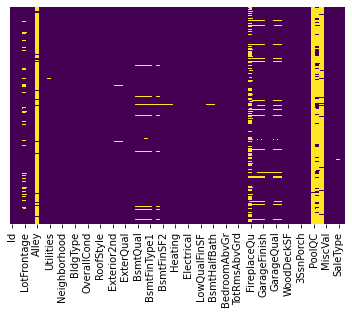

In [51]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [53]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1352
730
1456
1169
1408


In [54]:
data_copy = data.copy()
data_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
data_copy.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
data_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [56]:
data_copy.shape

(1459, 75)

In [57]:
data_copy['MSZoning'].fillna(data_copy['MSZoning'].mode()[0], inplace=True)
data_copy['LotFrontage'].fillna(data_copy['LotFrontage'].mean(), inplace=True)
data_copy['BsmtCond'].fillna(data_copy['BsmtCond'].mode()[0], inplace=True)
data_copy['BsmtQual'].fillna(data_copy['BsmtQual'].mode()[0], inplace=True)
data_copy['FireplaceQu'].fillna(data_copy['FireplaceQu'].mode()[0], inplace=True)
data_copy['GarageType'].fillna(data_copy['GarageType'].mode()[0], inplace=True)
data_copy['GarageFinish'].fillna(data_copy['GarageFinish'].mode()[0], inplace=True)
data_copy['GarageQual'].fillna(data_copy['GarageQual'].mode()[0], inplace=True)
data_copy['GarageCond'].fillna(data_copy['GarageCond'].mode()[0], inplace=True)

In [58]:
data_copy.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 75, dtype: int64

<AxesSubplot:>

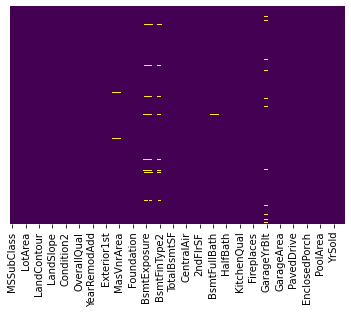

In [59]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [60]:
print(data['BsmtFinType2'].isna().sum())
print(data['BsmtExposure'].isna().sum())
print(data['GarageYrBlt'].isna().sum())
print(data['MasVnrArea'].isna().sum())

42
44
78
15


In [61]:
data_copy['BsmtFinType2'].fillna(data_copy['BsmtFinType2'].mode()[0], inplace=True)
data_copy['BsmtExposure'].fillna(data_copy['BsmtExposure'].mode()[0], inplace=True)
data_copy['GarageYrBlt'].fillna(data_copy['GarageYrBlt'].mode()[0], inplace=True)
data_copy['MasVnrArea'].fillna(data_copy['MasVnrArea'].mean(), inplace=True)

In [62]:
data_copy.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 75, dtype: int64

<AxesSubplot:>

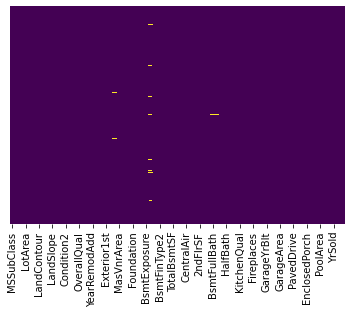

In [63]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [64]:
data_copy.shape

(1459, 75)

In [65]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [66]:
data_copy['Utilities'].fillna(data_copy['Utilities'].mode()[0], inplace=True)
data_copy['Exterior1st'].fillna(data_copy['Exterior1st'].mode()[0], inplace=True)
data_copy['Exterior2nd'].fillna(data_copy['Exterior2nd'].mode()[0], inplace=True)
data_copy['MasVnrType'].fillna(data_copy['MasVnrType'].mode()[0], inplace=True)
data_copy['BsmtFinType1'].fillna(data_copy['BsmtFinType1'].mode()[0], inplace=True)
data_copy['BsmtFinSF1'].fillna(data_copy['BsmtFinSF1'].mean(), inplace=True)
data_copy['BsmtFinSF2'].fillna(data_copy['BsmtFinSF2'].mean(), inplace=True)
data_copy['BsmtUnfSF'].fillna(data_copy['BsmtUnfSF'].mean(), inplace=True)
data_copy['TotalBsmtSF'].fillna(data_copy['TotalBsmtSF'].mean(), inplace=True)
data_copy['BsmtFullBath'].fillna(data_copy['BsmtFullBath'].mean(), inplace=True)
data_copy['BsmtHalfBath'].fillna(data_copy['BsmtHalfBath'].mean(), inplace=True)
data_copy['KitchenQual'].fillna(data_copy['KitchenQual'].mode()[0], inplace=True)
data_copy['Functional'].fillna(data_copy['Functional'].mode()[0], inplace=True)
data_copy['GarageCars'].fillna(data_copy['GarageCars'].mean(), inplace=True)
data_copy['GarageArea'].fillna(data_copy['GarageArea'].mean(), inplace=True)
data_copy['SaleCondition'].fillna(data_copy['SaleCondition'].mode()[0], inplace=True)

<AxesSubplot:>

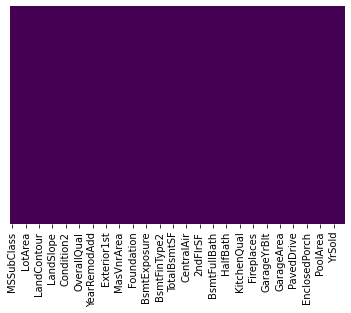

In [67]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [68]:
data_copy.shape

(1459, 75)

In [69]:
LE = LabelEncoder()
catFeatures = data_copy.select_dtypes(include='object').columns
print(catFeatures)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [70]:
for i in catFeatures:
    data_copy[i] = LE.fit_transform(data_copy[i])
data_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [73]:
mm = MinMaxScaler()
data_copy[:] = mm.fit_transform(data_copy[:])
data_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.50,0.329609,0.184147,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0.888889,0.8
1,0.000000,0.75,0.335196,0.232124,1.0,0.0,1.000000,0.0,0.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0.888889,0.8
2,0.235294,0.75,0.296089,0.224197,1.0,0.0,1.000000,0.0,1.0,0.0,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.888889,0.8
3,0.235294,0.75,0.318436,0.154326,1.0,0.0,1.000000,0.0,1.0,0.0,...,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0.888889,0.8
4,0.588235,0.75,0.122905,0.064121,1.0,0.0,0.333333,0.0,1.0,0.0,...,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,0.888889,0.8


In [75]:
X = data_copy.values
X.shape

(1459, 75)

In [76]:
X

array([[0.        , 0.5       , 0.32960894, ..., 1.        , 0.88888889,
        0.8       ],
       [0.        , 0.75      , 0.33519553, ..., 1.        , 0.88888889,
        0.8       ],
       [0.23529412, 0.75      , 0.29608939, ..., 1.        , 0.88888889,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.77653631, ..., 0.        , 0.88888889,
        0.        ],
       [0.38235294, 0.75      , 0.22905028, ..., 0.        , 0.88888889,
        0.8       ],
       [0.23529412, 0.75      , 0.29608939, ..., 0.        , 0.88888889,
        0.8       ]])

In [80]:
X_pred = torch.tensor(X).type(torch.float32)
X_pred

tensor([[0.0000, 0.5000, 0.3296,  ..., 1.0000, 0.8889, 0.8000],
        [0.0000, 0.7500, 0.3352,  ..., 1.0000, 0.8889, 0.8000],
        [0.2353, 0.7500, 0.2961,  ..., 1.0000, 0.8889, 0.8000],
        ...,
        [0.0000, 0.7500, 0.7765,  ..., 0.0000, 0.8889, 0.0000],
        [0.3824, 0.7500, 0.2291,  ..., 0.0000, 0.8889, 0.8000],
        [0.2353, 0.7500, 0.2961,  ..., 0.0000, 0.8889, 0.8000]])

In [85]:
X_pred.shape

torch.Size([1459, 75])

In [81]:
best_acc = 'best_acc.pth'

In [96]:
model.load_state_dict(torch.load(best_acc))
model.eval()
SalePrice = []
for x in X_pred:
    with torch.no_grad():
        output = model(x)
        output = output.numpy()[0]
        SalePrice.append(output)

In [97]:
SalePrice

[103468.06,
 130435.98,
 161887.9,
 173026.48,
 158889.77,
 162391.94,
 166807.72,
 155746.27,
 177116.27,
 105599.82,
 172958.88,
 84391.39,
 83702.06,
 136241.27,
 93377.625,
 319418.3,
 217600.06,
 290422.5,
 285648.53,
 410436.44,
 261338.6,
 185880.69,
 166655.0,
 150104.83,
 182224.6,
 188542.97,
 283845.25,
 211578.6,
 175039.69,
 232106.98,
 199169.83,
 75028.8,
 198971.78,
 268351.34,
 244179.92,
 225297.67,
 155010.66,
 154050.61,
 146924.62,
 150271.39,
 182676.6,
 142337.22,
 259126.84,
 223565.31,
 205444.38,
 177197.02,
 234226.69,
 194694.23,
 141880.12,
 133038.67,
 146091.55,
 168042.9,
 132652.16,
 161003.66,
 182739.84,
 157948.23,
 153891.69,
 120605.66,
 206497.36,
 122441.93,
 116196.695,
 173721.81,
 98340.56,
 111030.75,
 93679.516,
 94153.07,
 88477.555,
 137135.83,
 120232.67,
 181990.38,
 156522.4,
 98193.27,
 158621.17,
 140454.7,
 159920.62,
 102280.484,
 56682.613,
 147270.78,
 203634.28,
 117577.0,
 136477.08,
 130233.7,
 159284.62,
 73950.61,
 99874.266,

In [119]:
output_df = data.copy()
output_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [120]:
output_df['SalePrice'] = SalePrice
output_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,103468.062500
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,130435.976562
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,161887.906250
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,173026.484375
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,158889.765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,73393.062500
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,72784.757812
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,162485.890625
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,109706.000000


In [121]:
final_df = output_df[['Id', 'SalePrice']]
final_df

,Id,SalePrice
0,1461,103468.062500
1,1462,130435.976562
2,1463,161887.906250
3,1464,173026.484375
4,1465,158889.765625
...,...,...
1454,2915,73393.062500
1455,2916,72784.757812
1456,2917,162485.890625
1457,2918,109706.000000


In [122]:
final_df.to_csv('predicted_price.csv', index=False)